### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성 청년 SW아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

### **Objectives**
LLM을 활용하여 제품 메뉴얼 정보를 기반으로 QA Pair를 자동 생성을 통해 데이터셋 구축의 실제 과정을 체험합니다. 이를 통해 데이터 구성능력을 높이고, QA Pair 자동 생성의 실무적 활용법을 다뤄볼 예정입니다.
1. 실습 개요
    - LangChain 라이브러리를 사용하여 제품 메뉴얼에서 QA Pair를 자동으로 생성하고 데이터셋을 구축하는 실습
    - 고객 사용 사례를 기반으로 질문 유형을 분류하여 데이터셋을 체계화
    - 생성된 데이터셋에서 중복을 제거하고 품질을 평가하여 데이터셋을 정제

2. 실습 진행 목적 및 배경
    - **목적**: LLM을 활용한 QA Pair 자동 생성 및 데이터셋 구축 과정을 실습하여, 데이터 구성 능력을 향상시키고 실무적인 활용법을 익힙니다.
    - **배경**: 최근 LLM 기술의 발전으로 QA 챗봇 등 다양한 서비스에서 자동화된 데이터셋 구축의 필요성이 증가하고 있습니다. 이 실습을 통해 이러한 트렌드에 대응하고 실무에 적용 가능한 역량을 강화합니다.
3. 실습 수행으로 얻어갈 수 있는 역량
    - **데이터 구성 능력**: 제품 메뉴얼과 같은 비정형 데이터에서 QA Pair를 추출하고 정제하는 능력을 향상시킵니다.
    - **LLM 활용 능력**: LangChain과 같은 LLM 프레임워크를 활용하여 QA Pair 생성을 자동화하는 방법을 익힙니다.
    - **데이터 품질 평가**: 생성된 데이터셋의 품질을 평가하고 개선하는 방법을 학습합니다.
    - **실무 적용 능력**: 실제 서비스에 적용 가능한 QA 데이터셋 구축 및 활용 경험을 얻습니다.

4. 데이터셋 개요
    - 1강 실습에서 크롤링하여 수집한 데이터셋을 활용합니다.
5. 실습 핵심 내용
    - **LLM 기반 QA Pair 자동 생성**: LangChain을 활용하여 제품 메뉴얼에서 QA Pair를 자동으로 생성합니다.
    - **고객 사용 사례 기반 질문 유형화**: 고객의 사용 사례를 분석하여 질문 유형을 분류하고, 이를 기반으로 QA Pair를 생성합니다.
    - **데이터셋 정제 및 품질 평가**: 생성된 데이터셋에서 중복 제거 및 품질 평가를 수행하여 데이터셋의 완성도를 높입니다.
    - **실무 적용**: 구축된 QA 데이터셋을 실제 서비스에 적용하여 성능을 향상시키는 방안을 모색합니다.

### **Prerequisites**

```
langchain_community == 0.3.9
langchain == 0.3.9
pymupdf == 1.24.14
datasets  ==  3.1.0
```

### 필요 Library 설치 (#langchain #langchain-community #pymupdf)

코드에서 사용할 라이브러리들을 설치합니다.

In [1]:
%pip install -qU langchain

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -qU langchain-community pymupdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade "httpx<0.28"

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install datasets
%pip install openai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. QA Pair 생성 자동화 실습
LLM을 활용해 제품 메뉴얼 기반의 QA Pair를 자동으로 생성하는 방법을 학습자가 습득할 수 있도록 돕습니다. 학습자는 고객이 자주 묻는 질문을 미리 예측하고 QA 데이터셋을 구성함으로써, QA 챗봇의 대화 품질을 높이는 실질적인 방법을 배울 수 있습니다.

### **Exercise Overview**
- QA Pair 생성 자동화 실습
    - 필요 Library 설치 (#langchain #langchain-community #pymupdf)
    - `langchain`소개
    - `RecursiveCharacterTextSplitter`로 청깅해보기
    - `ChatPromptTemplate` 맛보기
    - chain으로 component 연결
    - prompt 강화로 구조화된 데이터 생성
- 고객 사용 사례를 반영한 질문 유형화 실습
    - Top-down 고객 사용 사례기반 분류
- 데이터셋 정제 및 품질 평가 실습
    - `TfidfVectorizer`를 이용하여 중복 제거
- (Appendix)`document_loaders` 사용해보기

## ⭐실습 코드 가이드⭐
실습 코드에서 ⭐ **표시된 주석**은 직접 값을 변경하며 결과의 차이를 체험해보는 부분입니다.

⭐ 표시가 있는 부분을 집중적으로 실습하며 다양한 변화를 확인해보세요!

### 1.1 LangChain이란?

LangChain은 다양한 자연어 처리(NLP) 작업을 쉽게 처리할 수 있도록 돕는 라이브러리입니다. 주로 텍스트 기반의 작업을 자동화하거나 향상시키는 데 사용됩니다. LangChain은 LLM과 다양한 데이터 소스를 결합하여, 보다 복잡한 질문과 답변 시스템, 텍스트 생성, 정보 추출 등을 쉽게 구현할 수 있도록 지원합니다.

LangChain의 주요 기능:
- LLM 통합: OpenAI GPT, Solar, HuggingFace 모델 등 여러 LLM을 지원
- Chain: 여러 작업을 하나의 프로세스로 연결하여 자동화
- Agent: 외부 도구와 상호작용하며 작업을 수행하는 에이전트 지원
- Document Loaders: 다양한 형식의 문서에서 데이터를 쉽게 로드


In [6]:
import langchain_community
import langchain
import pymupdf
import koreanize_matplotlib
import datasets

def print_version(lib):
    print(lib.__name__, " == ", lib.__version__)

print_version(langchain_community)
print_version(langchain)
print_version(pymupdf)
print_version(datasets)

langchain_community  ==  0.3.26
langchain  ==  0.3.26
pymupdf  ==  1.26.1
datasets  ==  3.6.0


In [7]:
import os
# from google.colab import userdata

api_key = "up_JS6nndROlwPvo1upTDEGE0iJVAkZK"  # ex: up_xxxYYYzzzAAAbbbCCC
os.environ["SOLAR_API_KEY"] = api_key

In [8]:
from langchain_community.chat_models.solar import SolarChat

llm = SolarChat(
    model="solar-pro",
    model_kwargs={
        "temperature": 0.2, # ⭐ temperature를 변경하여 차이를 확인해보세요
            }
)
llm.invoke("Solar의 뜻은 무엇인가?")

/var/folders/gz/2110lwqd6_n2vrd5_jvwgqmw0000gn/T/ipykernel_39555/804134494.py:3: LangChainDeprecationWarning: The class `SolarChat` was deprecated in LangChain 0.0.34 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-upstage package and should be used instead. To use it run `pip install -U :class:`~langchain-upstage` and import as `from :class:`~langchain_upstage import ChatUpstage``.
  llm = SolarChat(


AIMessage(content='Solar는 라틴어 "solaris"에서 유래되었으며, 이는 "태양"을 의미하는 "sol"에서 파생되었습니다. 따라서 Solar는 "태양과 관련된" 또는 "태양에서 나오는"을 의미합니다. 이 용어는 태양 에너지나 태양광과 관련된 맥락에서 자주 사용됩니다. 예를 들어, 태양광 발전은 태양 에너지를 전기로 변환하는 과정을 말합니다. 또한, Solar는 회사 이름이나 제품 이름으로도 사용되며, 이 경우 태양의 깨끗하고 재생 가능한 에너지를 상징할 수 있습니다.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 17, 'total_tokens': 129, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-pro', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--a9272fc0-a17d-4e8c-9b28-4e393098ba9f-0')

### 1.2 `RecursiveCharacterTextSplitter`로 청깅해보기

langchain.text_splitter 모듈에서 제공하는 RecursiveCharacterTextSplitter는 텍스트를 일정한 길이로 나누는 데 유용한 도구입니다. 긴 문서나 텍스트 데이터를 처리할 때, 이 도구는 주어진 길이 제한을 초과하지 않도록 텍스트를 재귀적으로 분할합니다. 이를 통해 텍스트를 LLM이 처리 가능한 크기로 나눌 수 있으며, 문맥이 끊기지 않도록 의미 있는 단위를 유지하는 데 중점을 둡니다. 주요 설정과 사용법에 대해 코드 예시와 함께 소개하겠습니다.

#### 1.2.1 RecursiveCharacterTextSplitter 사용 예시

아래는 RecursiveCharacterTextSplitter를 사용하여 1일차에서 업스테이지 DP(Document Parser)를 통해 얻은 content를 chunking을 수행하는 간단한 코드 예시입니다. (모든 데이터를 처리하는 것이 아닌 하나의 셈플 데이터를 처리하는 것으로 진행해보도록 하겠습니다.)


1일차 실습에서 완성한 전처리 데이터(DP pre-process)인 `processed_data.jsonl`를 다운받아  사용할 경우, <br> 구글드라이브에 (ex. `/content/drive`)에 업로드 후 load_jsonl 함수를 사용하세요.

혹은 huggingface의 'lomit/samsung_manual_dp' 데이터셋을 이용하실 수 있습니다.

In [9]:
# # 구글드라이브 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
DATA_DIR = '/Users/ijung-yun/SSAFY/DataTrack/Data'

In [11]:
import json
def load_jsonl(path):
    data_list = []
    with open(path, "r" , encoding='utf-8') as f:
        for line in f:
            data_list.append(json.loads(line))
    return data_list

data_list = load_jsonl(os.path.join(DATA_DIR, "processed_data_full.jsonl"))

# # huggingface에 업로드 되어 있는 매뉴얼을 불러오기
# from datasets import load_dataset
# dataset = load_dataset("lomit/samsung_manual_dp", split="train")
# data_list = dataset.to_list()

In [12]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
import re

sample_idx = 0
sample_data = data_list[sample_idx]


# text_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=2048, # ⭐ chunk_size와 chunk_overlap을 변경하여 생성되는 docs가 어떻게 변하는지 확인해보세요
#     chunk_overlap=10, # ⭐
#     length_function=len,
# )

# ⭐ separators의 정규표현식을 사용하여 상황에 맞는 split을 구현해보세요
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n+"],  # 줄바꿈 기준으로 분할
    is_separator_regex=True, # separator가 정규 표현식임을 설정
    chunk_size=1024,
    chunk_overlap=10,
    length_function=len,
)

docs = text_splitter.split_text("".join(sample_data["content"]))

In [13]:
""" ⭐
아래 코드는 텍스트를 토큰 단위로 분할하는 방법
이번 강의에서 다루지 않았지만, 필요에 따라 토큰 단위로 텍스트를 분할하는 방법도 구현할 수 있습니다.
이를 통해 모델이 처리하기 쉽고, 일관된 토큰 길이로 데이터를 나눌 수 있습니다.
특히 Tokenizer를 사용하면 단순 문자 단위 분할이 아닌 언어 모델의 토큰 기준으로 분할하는 것이 가능합니다.
"""
# from tokenizers import Tokenizer
# # Tokenizer 로드
# tokenizer = Tokenizer.from_pretrained("upstage/solar-pro-tokenizer")

# # 토큰 길이 계산 함수
# def token_length_function(text: str) -> int:
#     """
#     입력 텍스트를 토큰화하고 토큰 길이를 반환하는 함수
#     """
#     tokens = tokenizer.encode(text)
#     return len(tokens.ids)

# # RecursiveCharacterTextSplitter 설정
# text_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=1024,  # 토큰 단위 최대 청크 크기
#     chunk_overlap=10,  # 청크 중첩 크기
#     length_function=token_length_function,  # 토큰 길이를 계산하는 함수
#     separators=["\n+"],  # 줄바꿈 기준으로 분할
#     is_separator_regex=True
# )

# docs = text_splitter.split_text("".join(sample_data["content"]))

' ⭐\n아래 코드는 텍스트를 토큰 단위로 분할하는 방법\n이번 강의에서 다루지 않았지만, 필요에 따라 토큰 단위로 텍스트를 분할하는 방법도 구현할 수 있습니다.\n이를 통해 모델이 처리하기 쉽고, 일관된 토큰 길이로 데이터를 나눌 수 있습니다.\n특히 Tokenizer를 사용하면 단순 문자 단위 분할이 아닌 언어 모델의 토큰 기준으로 분할하는 것이 가능합니다.\n'

#### 1.2.2 주요 설정 및 기능

	• chunk_size: 텍스트 조각의 최대 길이를 설정합니다. 길이가 초과되지 않도록 재귀적으로 분할합니다.
	• chunk_overlap: 조각 간 겹치는 부분의 길이를 지정합니다. 이를 통해 문맥이 잘리지 않도록 보장합니다.

#### 1.2.3. 출력 결과 예시

위의 코드 실행 시 다음과 같이 텍스트가 조각으로 나뉩니다:

In [14]:
docs[:3]

['SAMSUNGPyKOBOACTBO\n�O�b3OBATE��!image\nSM-A035F/DS\nRussian. Rev.1.0 www.samsung.comCo�ep�aH�eOCHOBHble CBe�eH�� o6 59 Samsung Notes\n60 Samsung Members\nycTpo�cTBe\n60 Samsung Global Goals\n4 �po4T�Te nepe� �C�O�b30BaH�eM\n60 Samsung TV Plus\n6 YC�OB�� neperpeBa ycTpo�CTBa N BO3MO*Hble Shop\n60 Galaxy\npeweH��\n61 Ka�eH�apb\n10 ������� B�� ycTpo�cTBa N ⌀yHKUNN\n61 Ha�oM�HaH��\n14 3ap��ka aKKyMy��Topa\n63 3ByKO3a��cb\n16 SIM- N USIM-kapTa (KapTa nano-SIM)\n63 Mo� �a��bl\n17 KapTa �aM�T� (microSD)\n63 4acbl\n19 �������H�e N BbIK����eH�e ycTpo�cTBa\n64 Ka�bky��Top\n20 Ha�a�bHa� HacTpo�Ka\n64 O6MeH co�ep*�MbIM\n21 ������� 3a��cb Samsung\n65 �p��o�eH�� Google\n22 �epeHoc �aHHbIX C npeAbiAywero ycTpo�CTBa\n(Smart Switch)\n24 On�caH�e �yHK��� �KpaHa\n32 �aHe�b yBeAoM�eH�� HacTpo�K�\n33 BBOA TeKCTa BBe�eH�e\n66\n66 Samsung account\n66 �o�K����eH��\n�p��o�eH�� N �YHKUNN 68 Wi-Fi\n69 Bluetooth\n36 ycTaHOBKa N y�a�eH�e np��o�eH��\n70 �KOHOM�� Tpa����\n37 Te�e⌀oH\n71 To�bKO MOO��bHble �aHHble\

In [15]:
len(docs)

148

### 1.3 `ChatPromptTemplate` 맛보기

langchain_core.prompts에서 제공하는 **ChatPromptTemplate**는 LangChain에서 대화형 프롬프트를 관리하는 도구로, 여러 메시지를 포함하는 대화형 시스템을 설계할 때 유용합니다. 이를 통해 LLM에게 **시스템 메시지(System message)**와 **사용자 메시지(User message)**를 구분하여 전달할 수 있습니다. 각 메시지의 역할과 차이점에 대해 설명하고, 이를 코드 예시와 함께 소개하겠습니다.



#### 1.3.1. ChatPromptTemplate 사용 예시



In [16]:
from langchain_core.prompts import ChatPromptTemplate

In [17]:
# 전처리가된 데이터 중에서 product_name가 ""인 경우 llm을 통해 product_name을 뽑아냅니다.
if sample_data["product_name"] == "":
    extract_product_name_template = ChatPromptTemplate([
        ("system", """[제품 매뉴얼 첫 페이지]에서 제품 이름만 추출하라. 예제는 다음과 같다.  {product_name_list}"""),
        ("user", """제품 매뉴얼 첫 페이지 : {first_page}"""), # 보통 첫번째 페이지에서 "제품 이름"이 있으니 첫번째 docs만 이용하여 "제품 이름"을 추출한다.
    ])
    product_name_list = ["SAMSUNG Galaxy Z Fold3", "SAMSUNG Galaxy Z Flip3", "Samsung Galaxy S23"]
    result = llm.invoke(extract_product_name_template.format(product_name_list=product_name_list, first_page=docs[0]))
    title = result.content

else:
    # title = "SAMSUNG Galaxy Z Fold3 I Z Flip3 5G User manual"
    title = sample_data['product_name']

In [18]:
print(title)

Samsung Galaxy Z Fold3 



In [19]:
system_prompt = """{document_title} 중 한 페이지를 받게된다. 이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 답변을 주어진 정보를 기반하여 만들어라"""
user_prompt = """제품 매뉴얼 : {page_content}"""

prompt_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("user", user_prompt)
])

result = prompt_template.invoke({"page_content": docs[0], "document_title": sample_data['product_name']})

In [20]:
result

ChatPromptValue(messages=[SystemMessage(content=' 중 한 페이지를 받게된다. 이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 답변을 주어진 정보를 기반하여 만들어라', additional_kwargs={}, response_metadata={}), HumanMessage(content='제품 매뉴얼 : SAMSUNGPyKOBOACTBO\n�O�b3OBATE��!image\nSM-A035F/DS\nRussian. Rev.1.0 www.samsung.comCo�ep�aH�eOCHOBHble CBe�eH�� o6 59 Samsung Notes\n60 Samsung Members\nycTpo�cTBe\n60 Samsung Global Goals\n4 �po4T�Te nepe� �C�O�b30BaH�eM\n60 Samsung TV Plus\n6 YC�OB�� neperpeBa ycTpo�CTBa N BO3MO*Hble Shop\n60 Galaxy\npeweH��\n61 Ka�eH�apb\n10 ������� B�� ycTpo�cTBa N ⌀yHKUNN\n61 Ha�oM�HaH��\n14 3ap��ka aKKyMy��Topa\n63 3ByKO3a��cb\n16 SIM- N USIM-kapTa (KapTa nano-SIM)\n63 Mo� �a��bl\n17 KapTa �aM�T� (microSD)\n63 4acbl\n19 �������H�e N BbIK����eH�e ycTpo�cTBa\n64 Ka�bky��Top\n20 Ha�a�bHa� HacTpo�Ka\n64 O6MeH co�ep*�MbIM\n21 ������� 3a��cb Samsung\n65 �p��o�eH�� Google\n22 �epeHoc �aHHbIX C npeAbiAywero ycTpo�CTBa\n(Smart Switch)\n24 On�caH�e �yHK��� �KpaHa\n32 �aHe�b yBeAoM�eH�� HacTpo�K�\n33 BBOA TeKCTa BB

#### 1.3.2. 프롬프트 템플릿에 변수 전달

이 코드에서 **ChatPromptTemplate**을 사용하여 시스템 메시지와 사용자 메시지를 구성한 후, invoke() 메서드를 호출하여 실제로 변수를 전달하는 방식입니다. 이 방식은 프롬프트 내에서 동적으로 값을 채워 넣을 수 있게 해줍니다.

**시스템 메시지(System Prompt)**

```python
system_prompt = """{document_title} 중 한 페이지를 받게된다.
                   이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 응답을 주어진 정보를 기반하여 만들어라"""
```

- 여기에서 {document_title}은 변수입니다. 이 변수는 `invoke()` 호출 시 제공되는 데이터에서 "document_title" 키에 해당하는 값으로 치환됩니다.
- 시스템 메시지는 모델에게 문서의 제목을 제공하며, 그 제목을 바탕으로 페이지를 읽고 질문과 답변을 생성하라는 지침을 줍니다.

**사용자 메시지(User Prompt)**
```python
user_prompt = """제품 매뉴얼 : {page_content}"""
```
- {page_content}는 변수로, `invoke()` 메서드에서 제공되는 "page_content" 값을 기반으로 텍스트가 채워집니다.
- 사용자 메시지는 주어진 페이지 내용에 대한 정보를 모델에 전달하며, 이 정보를 바탕으로 모델이 질문과 답변을 만들도록 요청합니다.

#### 1.3.3. System 메시지 vs User 메시지

- System 메시지(System Message):
    - **역할**: 시스템 메시지는 모델에게 작업을 수행하는 데 있어 중요한 지침을 제공합니다. 시스템 메시지는 모델에게 “어떤 방식으로 응답해야 하는지”, “어떤 역할을 해야 하는지” 등을 정의합니다. 예를 들어, 모델에게 친절한 어시스턴트 역할을 하도록 지시하거나, 특정 스타일로 답변하도록 할 수 있습니다.
    - **사용 시점**: 시스템 메시지는 시스템 상태를 설정하고 모델에게 대화의 목표나 역할을 명확히 전달하는 데 사용됩니다. 보통 대화의 초기 설정에 해당하며, 대화의 흐름을 제어할 수 있습니다.

In [21]:
result.messages[0]

SystemMessage(content=' 중 한 페이지를 받게된다. 이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 답변을 주어진 정보를 기반하여 만들어라', additional_kwargs={}, response_metadata={})

- User 메시지(User Message):
	- **역할**: 사용자 메시지는 실제 대화에서 사용자가 모델에게 질문하거나 요청하는 내용을 포함합니다. 이 메시지는 모델이 응답해야 할 핵심 내용을 전달합니다. 사용자는 모델에게 특정 작업을 요청하거나 문제를 제시하며, 모델은 이를 바탕으로 답변을 제공합니다.
    - **사용 시점**: 사용자 메시지는 대화가 진행되는 동안 사용자가 모델에게 전달하는 메시지로, 모델의 응답을 이끌어내는 주요 정보로 작용합니다.

In [22]:
result.messages[1]

HumanMessage(content='제품 매뉴얼 : SAMSUNGPyKOBOACTBO\n�O�b3OBATE��!image\nSM-A035F/DS\nRussian. Rev.1.0 www.samsung.comCo�ep�aH�eOCHOBHble CBe�eH�� o6 59 Samsung Notes\n60 Samsung Members\nycTpo�cTBe\n60 Samsung Global Goals\n4 �po4T�Te nepe� �C�O�b30BaH�eM\n60 Samsung TV Plus\n6 YC�OB�� neperpeBa ycTpo�CTBa N BO3MO*Hble Shop\n60 Galaxy\npeweH��\n61 Ka�eH�apb\n10 ������� B�� ycTpo�cTBa N ⌀yHKUNN\n61 Ha�oM�HaH��\n14 3ap��ka aKKyMy��Topa\n63 3ByKO3a��cb\n16 SIM- N USIM-kapTa (KapTa nano-SIM)\n63 Mo� �a��bl\n17 KapTa �aM�T� (microSD)\n63 4acbl\n19 �������H�e N BbIK����eH�e ycTpo�cTBa\n64 Ka�bky��Top\n20 Ha�a�bHa� HacTpo�Ka\n64 O6MeH co�ep*�MbIM\n21 ������� 3a��cb Samsung\n65 �p��o�eH�� Google\n22 �epeHoc �aHHbIX C npeAbiAywero ycTpo�CTBa\n(Smart Switch)\n24 On�caH�e �yHK��� �KpaHa\n32 �aHe�b yBeAoM�eH�� HacTpo�K�\n33 BBOA TeKCTa BBe�eH�e\n66\n66 Samsung account\n66 �o�K����eH��\n�p��o�eH�� N �YHKUNN 68 Wi-Fi\n69 Bluetooth\n36 ycTaHOBKa N y�a�eH�e np��o�eH��\n70 �KOHOM�� Tpa����\n37 Te�e⌀oH\n

- 이점 및 활용
    - 시스템 메시지는 모델에게 일관된 행동 방식을 부여하여, 사용자가 어떤 질문을 하든 모델이 동일한 스타일로 응답할 수 있도록 합니다. 이를 통해 모델의 응답 품질과 일관성을 높일 수 있습니다.
    - 사용자 메시지는 동적인 질문을 포함하여, 모델이 실제로 대화의 흐름을 따르도록 만듭니다. 사용자가 원하는 작업이나 정보가 무엇인지 명확히 전달할 수 있습니다.

### 1.4 chain으로 component 연결

앞서 다뤘던 LLM과 ChatPromptTemplate를 연결하기 위해 **LangChain Expression Language (LCEL)** 표현식을 사용하려합니다.
> LangChain Expression Language (LCEL)란?
<br>LangChain에서 모델을 실행하거나 여러 컴포넌트를 결합할 때 사용하는 표현 방식입니다. LCEL을 사용하면 정의된 프롬프트 템플릿과 LLM을 연결하여 더 동적인 모델 실행을 할 수 있습니다.

In [23]:
chain = prompt_template | llm

정의된 chain을 `get_graph()` 메서드와 `draw_mermaid_png()` 메서드를 활용하여 chain의 구성을 확인할 수 있습니다.

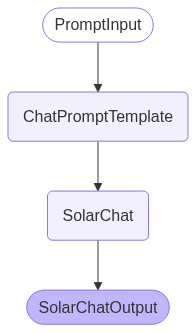

In [24]:
from IPython.display import Image

Image(chain.get_graph().draw_mermaid_png())

invoke() 메서드는 **LLMChain**을 실행할 때 사용되며, 템플릿에 전달할 입력 데이터를 **딕셔너리 타입(dict)**로 전달합니다. 이 입력 딕셔너리에는 프롬프트 템플릿에서 정의한 변수들이 포함되며, 각 변수에 대한 실제 값이 key-value 쌍으로 제공됩니다. 이 방식은 동적으로 값을 채워 넣어 유연하게 템플릿을 실행할 수 있게 해줍니다.

In [25]:
response = chain.invoke({"page_content": docs[1],
                         "document_title": sample_data['product_name']})

In [26]:
response

AIMessage(content="질문 1: 제품 매뉴얼에 언급된 'Smart Lock'은 무엇을 의미하나요?\n답변: 'Smart Lock'은 일반적으로 디지털 보안 시스템의 일부로, 사용자가 비밀번호나 생체 인식 등을 통해 장치에 접근할 수 있게 해주는 기능을 의미합니다. 이 제품은 아마도 스마트 홈 장치와 연동하여 보안을 강화하는 기능을 제공할 것입니다.\n\n질문 2: 'Samsung Cloud'와 'Google'은 제품과 어떤 관련이 있나요?\n답변: 'Samsung Cloud'와 'Google'은 클라우드 서비스 제공업체로, 이 제품은 이들 클라우드 서비스와 연동하여 데이터 저장, 백업, 동기화 등의 기능을 제공할 수 있습니다. 사용자는 클라우드 서비스를 통해 데이터를 안전하게 저장하고 어디서든 접근할 수 있습니다.\n\n질문 3: 'ycTpoCTBa'와 'ycTpocTBa'는 어떤 기능을 나타내나요?\n답변: 이 두 용어는 제품의 특정 기능이나 구성 요소를 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 버전에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다.\n\n질문 4: 'CBeeH o Tee⌀oHepoeHe'는 무엇을 의미하나요?\n답변: 이 용어는 제품의 특정 기능이나 설정을 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 사용 언어에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다.\n\n질문 5: 'HeoaoK3OCHOBHble CBeeH o6'는 어떤 기능을 나타내나요?\n답변: 이 용어는 제품의 특정 기능이나 구성 요소를 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 버전에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 413,

In [27]:
response.content

"질문 1: 제품 매뉴얼에 언급된 'Smart Lock'은 무엇을 의미하나요?\n답변: 'Smart Lock'은 일반적으로 디지털 보안 시스템의 일부로, 사용자가 비밀번호나 생체 인식 등을 통해 장치에 접근할 수 있게 해주는 기능을 의미합니다. 이 제품은 아마도 스마트 홈 장치와 연동하여 보안을 강화하는 기능을 제공할 것입니다.\n\n질문 2: 'Samsung Cloud'와 'Google'은 제품과 어떤 관련이 있나요?\n답변: 'Samsung Cloud'와 'Google'은 클라우드 서비스 제공업체로, 이 제품은 이들 클라우드 서비스와 연동하여 데이터 저장, 백업, 동기화 등의 기능을 제공할 수 있습니다. 사용자는 클라우드 서비스를 통해 데이터를 안전하게 저장하고 어디서든 접근할 수 있습니다.\n\n질문 3: 'ycTpoCTBa'와 'ycTpocTBa'는 어떤 기능을 나타내나요?\n답변: 이 두 용어는 제품의 특정 기능이나 구성 요소를 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 버전에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다.\n\n질문 4: 'CBeeH o Tee⌀oHepoeHe'는 무엇을 의미하나요?\n답변: 이 용어는 제품의 특정 기능이나 설정을 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 사용 언어에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다.\n\n질문 5: 'HeoaoK3OCHOBHble CBeeH o6'는 어떤 기능을 나타내나요?\n답변: 이 용어는 제품의 특정 기능이나 구성 요소를 나타낼 수 있습니다. 정확한 의미는 제품의 모델이나 버전에 따라 다를 수 있으며, 매뉴얼의 다른 부분이나 공식 웹사이트에서 자세한 설명을 찾아볼 수 있습니다."

chain을 통해 얻은 문자열은 구조화가 되어 있는 데이터 유형이 아니기 때문에 별다른 처리가 필요해보입니다.

### 1.5 prompt 강화
이번 코드에서는 **JSON 포맷팅**을 사용하여 모델의 응답을 **구조화된 형태**로 생성하는 방법을 소개하고 있습니다. JSON 포맷팅은 데이터를 체계적으로 정리하고, 모델의 응답을 자동으로 처리하거나 후속 작업에 활용할 수 있게 해줍니다.

In [28]:
system_prompt = """{document_title} 중 한 페이지를 받게된다. 이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 답변을 주어진 정보를 기반하여 만들어라.
단 아래의 JSON format에 맞게 응답해야한다.

quesion and answer are in Korean.
```JSON
[
    {{
        "question": str, # 사용자의 질문
        "answer": str # 질문에 대한 응답
    }}
]
```
(주어진 정보가 질문하기에 충분하지 않다면 빈 list를 반환하라)
"""
user_prompt = """제품 매뉴얼 : {page_content}"""

prompt_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("user", user_prompt)
])

In [29]:
# 새롭게 정의된 prompt를 chain에 적용
chain = prompt_template | llm

In [30]:
response = chain.invoke({"page_content": docs[1], "document_title": title})

In [31]:
response.content

'```json\n[]\n``` \n'

JsonOutputParser는 LangChain에서 JSON 형식의 데이터를 쉽게 처리하고 파싱할 수 있는 도구입니다. JsonOutputParser는 모델의 응답을 JSON 형식으로 파싱하여, 결과를 명확하고 구조화된 형태로 변환하는 데 사용됩니다.

In [32]:
from langchain_core.output_parsers import JsonOutputParser

parser = JsonOutputParser()

In [33]:
json_data = parser.parse(response.content)
json_data

[]

In [34]:
# parser 또한 chain으로 구성할 수 있습니다.
chain = prompt_template | llm | parser

##2. 고객 사용 사례를 반영한 질문 유형화 실습



### 2.1 Top-down 고객 사용 사례기반 분류
이론시간에 *다룬 고객의 사용 사례 기반 서비스 디자인* 내용 중 질문 유형 분류에 필요성과 사용자 사례를 Top-down접근하여 사용자 사례의 대분류를 만들었습니다. 이를 기반으로 질의의 분류를 함께 할 수 있도록 prompt를 업데이트하여 결과를 받아보도록 합시다.


In [35]:
system_prompt = """{document_title} 중 한 페이지를 받게된다. 이를 읽고 사용자들이 질문할 만한 질문과 이에 대한 답변을 주어진 정보를 기반하여 만들어라.
단 아래의 JSON format에 맞게 응답해야한다.

(주어진 정보가 질문하기에 충분하지 않다면 빈 list를 반환하라)
질문과 답변은 한국어로 작성해야 한다.

질문과 답변은 다음과 같은 카테고리로 분류된다:
1. '문제 해결' - 제품 사용 중 발생할 수 있는 문제를 해결하는 질문
2. '제품 사용법 이해' - 제품 사용법과 관련된 질문
3. '정보 탐색 및 선택' - 제품에 대한 정보나 선택과 관련된 질문

```JSON
[
    {{
        "question": str, # 사용자의 질문
        "answer": str, # 질문에 대한 응답
        "category": str # 질문의 카테고리 ('문제 해결', '제품 사용법 이해', '정보 탐색 및 선택', ...)
    }}
]
"""# ⭐ system_prompt, user_prompt를 변경하여 결과 값이 어떻게 변하는지 확인하여 만족하는 prompt를 찾아보세요 (아래 [참고 자료]의 prompt 가이드를 보고 최적화 해보세요)
user_prompt = """제품 매뉴얼 : {page_content}"""# ⭐

prompt_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("user", user_prompt)
])

#### [참고자료]
아래 참고 자료들은 Solar LLM prompt 가이드 입니다.
- [Role and Style Prompting](https://github.com/UpstageAI/solar-prompt-cookbook/blob/main/05_Chapter%205.%20Role%20and%20Style%20Prompting.ipynb)

- [Unstructured vs. Structured Prompting](https://github.com/UpstageAI/solar-prompt-cookbook/blob/main/06_Chapter%206.%20Unstructured%20vs.%20Structured%20Prompting.ipynb)

아래 코드는 LangChain의 Output Parser 기능을 사용하여 LLM의 출력에서 발생할 수 있는 에러를 자동으로 수정하기 위한 설정을 추가한 예시입니다.

- OutputFixingParser는 LLM 출력이 주어진 형식에 맞지 않거나 오류가 발생했을 때 이를 수정하는 역할을 합니다.
- fix_parser는 기존의 parser와 LLM을 기반으로 생성되며, 오류가 감지될 경우 LLM을 다시 호출하여 형식을 보정합니다.
- 마지막 줄의 chain에 fix_parser를 추가함으로써, 입력에서 출력으로 이어지는 파이프라인에 오류 복구 기능을 통합합니다.

이 설정은 에러 처리 자동화를 통해 사용자 경험을 향상시키고, 출력의 일관성을 유지하는 데 유용합니다.

In [36]:
from langchain.output_parsers import OutputFixingParser
fix_parser = OutputFixingParser.from_llm(parser=parser, llm=llm, max_retries=5)

In [37]:
chain = prompt_template | llm | fix_parser

In [38]:
response = chain.invoke({"page_content": docs[10], "document_title": title})

In [39]:
response

[{'question': '갤럭시 Z 폴드3의 매뉴얼을 어떻게 읽을 수 있나요?',
  'answer': '매뉴얼은 제품과 함께 제공되는 종이 매뉴얼이나 Samsung Members 앱에서 확인할 수 있습니다.',
  'category': '정보 탐색 및 선택'},
 {'question': "갤럭시 Z 폴드3의 매뉴얼에서 'COb3OBaH'는 무슨 뜻인가요?",
  'answer': '이는 매뉴얼의 일부가 잘못 표시된 것으로 보입니다. 정확한 정보를 얻으려면 Samsung Members 앱이나 Samsung 공식 웹사이트를 참조하세요.',
  'category': '정보 탐색 및 선택'},
 {'question': "갤럭시 Z 폴드3의 매뉴얼에서 'npoeH'는 무슨 뜻인가요?",
  'answer': '이는 매뉴얼의 일부가 잘못 표시된 것으로 보입니다. 정확한 정보를 얻으려면 Samsung Members 앱이나 Samsung 공식 웹사이트를 참조하세요.',
  'category': '정보 탐색 및 선택'},
 {'question': "갤럭시 Z 폴드3의 매뉴얼에서 'COb30BaH'는 무슨 뜻인가요?",
  'answer': '이는 매뉴얼의 일부가 잘못 표시된 것으로 보입니다. 정확한 정보를 얻으려면 Samsung Members 앱이나 Samsung 공식 웹사이트를 참조하세요.',
  'category': '정보 탐색 및 선택'}]

아래 코드의 일부분은 제품 이름(product_name)이 누락된 경우 이를 자동으로 추출하기 위해 다른 PDF 문서에서 가져온 제품 이름 리스트를 활용하여 Few-shot Prompt를 적용한 사례입니다.

1.	제품 이름 리스트 활용:
    - product_name_list는 다른 PDF에서 사전 추출된 제품 이름들의 예시입니다.
    - Few-shot Prompt에서 예제 역할을 하여 LLM이 보다 정확히 제품 이름을 추출할 수 있도록 돕습니다.
2.	첫 페이지 기반 추출:
    - 제품 매뉴얼의 첫 페이지(docs[0])는 보통 제품 이름이 포함되어 있으므로, 이를 Prompt에 포함시켜 LLM으로부터 제품 이름을 추출합니다.
3.	Prompt 템플릿 설계:
    - extract_product_name_template은 두 부분으로 구성됩니다:
    - System 메시지: 제품 이름 추출에 대한 명령과 예제를 제공.
    - User 메시지: 실제 매뉴얼의 첫 페이지 내용을 전달.
4.	자동화된 이름 추출:
    - extract_product_name_chain을 통해 첫 페이지 내용을 입력으로 사용하고, 누락된 product_name 값을 자동으로 채웁니다.

In [40]:
import random
# 추후 사용하는 데이터 품질 평가를 위해 사용한 context(doc)를 추가하는 작업을 위해 다음과 같은 함수를 정의합니다.
def loop_chain_docs(chain, docs, data, product_name_list, debug_mode=False, batch_procecss=True):

    # product_name이 없는 경우
    if data["product_name"] == "":
        extract_product_name_template = ChatPromptTemplate([
        ("system", """Extract product_name from [first page]

### few-shot example
{product_name_list}

YOU MUST ANSWER ONLY PRODUCT NAME!!
DO NOT TRANSLATE PRODUCT NAME INTO OTHER LANGUAGE
answer like "Samsung Galaxy S10 Lite (128GB)"
"""),
        ("user", """first page : {first_page}""")
    ])
        llm = SolarChat(temperature=0.0)
        extract_product_name_chain = extract_product_name_template | llm
        # 보통 첫번째 페이지에서 "제품 이름"이 있으니 첫번째 docs만 이용하여 "제품 이름"을 추출
        response = extract_product_name_chain.invoke({"product_name_list": product_name_list, "first_page": docs[0]})
        data["product_name"] = response.content

    if debug_mode:
        # random sample 20%
        docs = random.sample(docs, int(len(docs) * 0.20))

    if batch_procecss:
        batch_docs = [{"page_content": doc, "document_title": data["product_name"]} for doc in docs if doc]
        batch_response = chain.batch(batch_docs, config={"max_concurrency": 10})
        result = []
        for batch_item, doc in zip(batch_response, docs):
            if isinstance(batch_item, list):
                for item in batch_item:
                    item["context"] = doc
                    item["product_name"] = data["product_name"]
                    # result.extend(batch_item)   # 기존코드
                    result.append(item)   # 실제로 돌아갔어야 할 코드
            elif batch_item is not None:
                batch_item["context"] = doc
                batch_item["product_name"] = data["product_name"]
                result.append(batch_item)
        return result
    else:
        result = []
        for doc in docs:
            response = chain.invoke({"page_content": doc, "document_title": data["product_name"]})
            for item in response:
                item["context"] = doc
                item["product_name"] = data["product_name"]
            result.extend(response)

        return result

In [41]:
%pip install ipywidgets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm.notebook import tqdm_notebook
product_name_list = [data["product_name"] for data in data_list if data["product_name"]]

qa_dataset = []
for data in tqdm_notebook(data_list):  # 일반적으로 문서 1개 당 약 1-2분 소요

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=2048,
        chunk_overlap=10,
        length_function=len,
    )
    docs = text_splitter.split_text("".join(data["content"]))

    result = loop_chain_docs(chain, docs, data, product_name_list, debug_mode=False, batch_procecss=True)
    qa_dataset.extend(result)

  0%|          | 0/5 [00:00<?, ?it/s]

RateLimitError: Error code: 429 - {'error': {'message': "You've reached your API request limit. Please wait and try again later. If your use case requires a higher rate limit, you can request an increase at https://support.upstage.ai. Including your intended use case and expected volume will help us process your request faster", 'type': 'too_many_requests', 'param': '', 'code': 'too_many_requests'}}

## 3. 데이터셋 정제 및 품질 평가 실습

LLM으로 생성된 QA 데이터셋을 정제하고 품질을 평가하는 단계입니다.

이 단계에서는 다음과 같은 작업을 수행합니다.

1. 데이터 정제: LLM이 생성한 QA 데이터셋에서 구조화되지 않거나 적절하지 않은 데이터들을 제거합니다.
    - 예를 들어, JSON 형식에 맞지 않는 데이터, 필요한 필드가 누락된 데이터 식별하고 제거합니다.

2. 중복 제거: `TfidfVectorizer`와 코사인 유사도를 사용하여 중복 질문과 답변을 제거합니다.
    - `deduplicate_df` 함수는 데이터프레임에서 중복된 질문과 답변 쌍을 식별하고 제거합니다.
    - `recursive_deduplicate` 함수는 데이터프레임을 여러 윈도우로 분할하여 각 윈도우에서 중복 제거를 반복 적용하여 더욱 효과적으로 중복을 제거합니다.

3. 품질 평가: 정제된 데이터셋을 시각화하여 생성된 QA 데이터의 질의 카테고리 분포를 확인합니다.

    - 다양한 시각화 도구(예: matplotlib, seaborn)를 사용하여 카테고리별 데이터 수, 비율 등을 분석합니다.
    - 이를 통해 데이터셋의 균형성, 다양성, 편향 등을 파악하고 개선 방향을 설정할 수 있습니다.

이러한 정제 및 평가 과정을 통해 최종적으로 높은 품질의 QA 데이터셋을 구축하고, 이를 기반으로 효과적인 QA 챗봇 등의 서비스를 개발할 수 있습니다.



### 3.1 데이터 정제
이 섹션에서는 LLM으로 생성된 QA 데이터셋에서 구조화되지 않거나 적절하지 않은 데이터들을 제거하는 방법을 설명합니다.

작업 내용:

1. 데이터프레임 변환: 생성된 QA 데이터셋을 Pandas DataFrame으로 변환합니다. 이를 통해 데이터를 보다 쉽게 조작하고 분석할 수 있습니다.
2. 값 확인: DataFrame에서 누락된 값(NaN)이 있는지 확인합니다. `isna().sum()` 메서드를 사용하여 각 열에 누락된 값의 개수를 확인합니다.
3. 약속되지 않은 결과물 제거: 필요한 필드가 누락된 데이터를 제거합니다. 예를 들어, 'question', 'answer', 'category', 'context', 'product_name' 열에 값이 없는 행을 삭제합니다.
4. 누락 값 재확인: 데이터 정제 후 다시 한번 누락된 값이 있는지 확인합니다. `isna().sum()` 메서드를 사용하여 누락된 값이 없는지 확인합니다.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# pandas dataframe으로 변형
df = pd.DataFrame(qa_dataset)

In [ ]:
# 값 확인
df.isna().sum()

,0
question,3
answer,7
category,19
context,0
product_name,0


In [ ]:
# 약속되지 않은 결과물은 삭제
df = df[['question', 'answer', 'category', 'context', 'product_name']].dropna()

In [ ]:
df.isna().sum()

,0
question,0
answer,0
category,0
context,0
product_name,0


### 3.2 중복 제거
이 섹션에서는 TfidfVectorizer와 코사인 유사도를 사용하여 중복 질문과 답변을 제거하는 방법을 설명합니다.

작업 내용:
1. TF-IDF 벡터화: TfidfVectorizer를 사용하여 질문과 답변을 벡터화합니다. TF-IDF는 텍스트에서 단어의 중요도를 나타내는 수치적 표현입니다.
2. 코사인 유사도 계산: 벡터화된 질문과 답변 사이의 코사인 유사도를 계산합니다. 코사인 유사도는 두 벡터 사이의 유사성을 측정하는 지표입니다.
3. 중복 인덱스 저장: 코사인 유사도가 특정 임계값(예: 0.7)보다 높은 질문과 답변 쌍을 중복으로 간주하고 해당 인덱스를 저장합니다.
4. 중복 제거: 중복 인덱스를 기반으로 DataFrame에서 중복된 행을 제거합니다.
5. 재귀적 중복 제거: 데이터프레임을 여러 윈도우로 분할하여 각 윈도우에서 중복 제거를 반복 적용합니다. 이를 통해 더욱 효과적으로 중복을 제거할 수 있습니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def deduplicate_df(df, threshold=0.7):

    questions = [q + a for q, a  in df[["question", "answer"]].values]

    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(questions)

    # 코사인 유사도 계산
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # 중복 인덱스 저장
    duplicate_indices = set()
    for idx in range(len(questions)):
        if idx in duplicate_indices:
            continue
        sims = cosine_sim[idx]
        similar_indices = np.where(sims > threshold)[0]
        for sim_idx in similar_indices:
            if sim_idx != idx:
                duplicate_indices.add(sim_idx)
    deduplicated_qa_list = [idx for idx, _ in enumerate(df[["question", "answer"]].values) if idx not in duplicate_indices]
    return df.iloc[deduplicated_qa_list]

def recursive_deduplicate(df, n=2, window_size=128, threshold=0.7):
    """데이터프레임에서 중복된 질문과 답변 쌍을 재귀적으로 제거합니다.

    Args:
        df (pd.DataFrame): 중복 제거를 수행할 데이터프레임.
        n (int, optional): 재귀 횟수. 기본값은 2입니다.
        window_size (int, optional): 데이터프레임을 분할할 윈도우 크기. 기본값은 128입니다.
        threshold (float, optional): 중복으로 간주할 코사인 유사도 임계값. 기본값은 0.7입니다.

    Returns:
        pd.DataFrame: 중복 제거된 데이터프레임.
    """
    deduplicated_qa_list = []
    # suffle df
    df = df.sample(frac=1).reset_index(drop=True)
    for i in range(0, len(df), window_size):
        df_window = df.iloc[i:i+window_size]
        deduplicated_qa_list.append(deduplicate_df(df_window, threshold=threshold))
    if n > 1:
        return recursive_deduplicate(pd.concat(deduplicated_qa_list), n-1, window_size)
    return pd.concat(deduplicated_qa_list)

In [ ]:
sample_product_name = df.product_name.unique()[0]
sub_sample_df = df.loc[df.product_name == sample_product_name]

# ⭐ 중복 제거로 대상이 되는 값이 질문인 경우와 질문과 답변을 같이 사용한 경우
#    제거가 되는 값(n 시행횟수)이 어떻게 변하는지 확인하고 유사도(threshold)를 변경하였을 때의 경향성을 확인해보세요
#    (n, window_size, threshold) 값에 따라서 어떻게 변하는지 확인해보세요
dedu_df = recursive_deduplicate(df, n=2, window_size=32, threshold=0.7)

In [ ]:
len(dedu_df) / len(df)

0.9950556242274413

### 3.3 품질 평가
이 섹션에서는 정제된 데이터셋을 시각화하여 생성된 QA 데이터의 질의 카테고리 분포를 확인하는 방법을 설명합니다.

작업 내용:
1. 카테고리별 데이터 수 확인: `value_counts()` 메서드를 사용하여 각 카테고리에 속하는 데이터의 개수를 확인합니다.
2. 원형 차트 생성: matplotlib 또는 seaborn 라이브러리를 사용하여 카테고리별 데이터 수를 원형 차트로 시각화합니다.
3. 분포 분석: 원형 차트를 통해 데이터셋의 균형성, 다양성, 편향 등을 파악합니다.
4. 개선 방향 설정: 분석 결과를 바탕으로 데이터셋의 품질을 개선하기 위한 방향을 설정합니다. 예를 들어, 특정 카테고리에 데이터가 부족한 경우 해당 카테고리의 데이터를 추가적으로 생성할 수 있습니다.

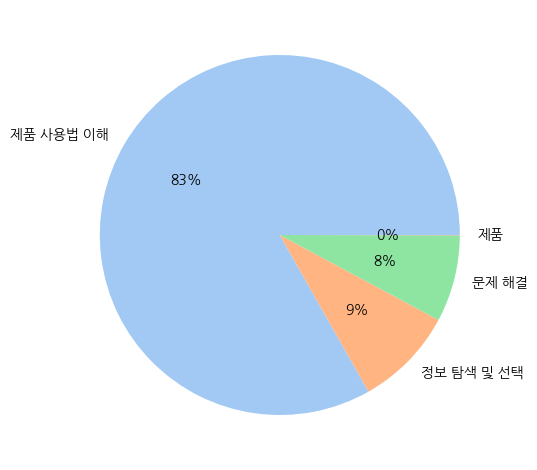

In [ ]:
import koreanize_matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# how many category in dataframe
num_cat = dedu_df.category.nunique()

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:num_cat]
dedu_df.category.value_counts()
# create pie chart
plt.pie(x=dedu_df.category.value_counts().values,
        labels=dedu_df.category.value_counts().index.values,
        colors = colors,
        autopct='%.0f%%')
plt.tight_layout()
plt.show()

In [ ]:
len(dedu_df)

3220

In [ ]:
json_data = []
for i, entry in dedu_df.iterrows():
    json_data.append({
        "question": entry["question"],
        "answer": entry["answer"],
        "category": entry["category"],
        "product_name": entry["product_name"],
        "context": entry["context"]
    })

In [ ]:
import json

# Save as a single JSON file
json_output_path = os.path.join(DATA_DIR, 'qa_dataset_full.json')
with open(json_output_path, 'w', encoding='utf-8') as file:
    json.dump(json_data, file, ensure_ascii=False, indent=4)


In [ ]:
(pd.DataFrame(json_data)).to_excel(os.path.join(DATA_DIR, 'qa_dataset_full.xlsx'), index=False)

## 4.0 로컬 환경에 `qa_dataset_full.json` 파일 다운로드

In [ ]:
from google.colab import files

# 다운로드 받을 파일 경로
file_path = os.path.join(DATA_DIR, 'qa_dataset_full.json')

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## (Appendix) langchain의 `document_loaders` 사용해보기

LangChain의 Document Loader는 다양한 문서 형식(PDF, 텍스트 파일, 웹 페이지 등)을 읽어들이고, 그 내용을 텍스트 데이터로 변환하여 처리할 수 있게 도와주는 유용한 도구입니다. 아래의 코드를 사용하여 LangChain에서 PDF 파일을 불러오는 방법을 설명하겠습니다.

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(os.path.join(DATA_DIR, "z_fold3.pdf"))
docs = loader.load()

설명:
- `PyMuPDFLoader`: 이 클래스는 PyMuPDF 라이브러리를 사용하여 PDF 파일을 읽어옵니다. 이 문서 로더는 PDF 파일에서 텍스트를 추출하고 이를 LangChain에서 처리할 수 있는 형태로 변환합니다
- `loader.load()`: 이 메서드는 지정된 경로의 PDF 파일을 로드하여 문서 내용이 포함된 리스트를 반환합니다. 각 문서는 텍스트 데이터로 변환되어 나열됩니다.

문서를 처리할 때, **metadata**는 문서에 대한 유용한 정보를 담고 있습니다. Langchain을 사용하여 문서를 로드할 때 마다, 해당 문서의 **metadata**를 확인할 수 있습니다. 이를 통해 파일의 제목, 페이지 수, 작성자, 생성일자 등 다양한 정보에 접근할 수 있습니다.

In [ ]:
docs[0].metadata

{'source': '/content/z_fold3.pdf',
 'file_path': '/content/z_fold3.pdf',
 'page': 0,
 'total_pages': 181,
 'format': 'PDF 1.7',
 'title': 'Samsung Galaxy Z Fold3|Z Flip3 5G F926|F711 User Manual',
 'author': 'Samsung',
 'subject': '',
 'keywords': 'Samsung Galaxy Z Fold3|Z Flip3 5G; F926|F711; Samsung Galaxy Z Fold3|Z Flip3 5G F926|F711; Samsung Galaxy Z Fold3|Z Flip3 5G user guide; Samsung Galaxy Z Fold3|Z Flip3 5G manual; F926|F711 user guide; F926|F711 manual',
 'creator': '',
 'producer': '',
 'creationDate': "D:20211014152251-05'00'",
 'modDate': "D:20211014152616-05'00'",
 'trapped': ''}

In [ ]:
len(docs)

181